In [1]:
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(28, 28)


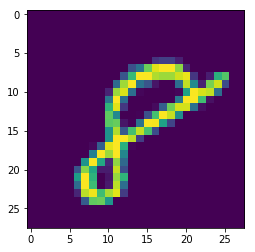

In [4]:
plt.imshow(X_train[59999])
print(X_train[2].shape)

In [5]:
X_train[0].shape

(28, 28)

In [6]:
from tensorflow.keras.utils import to_categorical

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train_flatten = X_train.reshape(len(X_train), num_pixels)
X_test_flatten = X_test.reshape(len(X_test), num_pixels)

X_train_norm = X_train_flatten / 255
X_test_norm = X_test_flatten / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [7]:
X_train_norm[3].shape

(784,)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x=X_train_norm,y=y_train,
          validation_data=(X_test_norm,y_test),
          epochs=5)
          
model.summary()

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 6.4750 - accuracy: 0.8117 - val_loss: 0.5500 - val_accuracy: 0.8822
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4291 - accuracy: 0.9003 - val_loss: 0.3906 - val_accuracy: 0.9083
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2992 - accuracy: 0.9230 - val_loss: 0.2855 - val_accuracy: 0.9321
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2439 - accuracy: 0.9358 - val_loss: 0.2769 - val_accuracy: 0.9367
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2171 - accuracy: 0.9443 - val_loss: 0.2356 - val_accuracy: 0.9455
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
d

In [9]:
y_predict = model.predict(X_test_norm)

In [10]:
y_predict[0]

array([1.7105862e-20, 5.8790116e-16, 1.1353432e-06, 2.3923615e-06,
       2.3779989e-10, 4.1392056e-11, 2.0199074e-17, 9.9999630e-01,
       2.6741749e-11, 9.0579228e-08], dtype=float32)

In [11]:
np.argmax(y_predict[12])

9

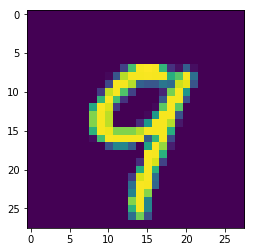

In [12]:
plt.imshow(X_test[12])

In [13]:
scores = model.evaluate(X_test_norm, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 5.45%
